In [ ]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt

In [ ]:
#preparing training data

In [ ]:
train_data_length = 1024
train_data=torch.zeros((train_data_length,2))
train_data[:,0]=2*math.pi*torch.rand(train_data_length)
train_data[:,1]=torch.sin(train_data[:,0])
train_labels=torch.zeros(train_data_length)



In [ ]:
train_set=[(train_data[i],train_labels[i])for i in range(train_data_length)]
(train_set)

[(tensor([2.3315, 0.7243]), tensor(0.)),
 (tensor([2.2614, 0.7709]), tensor(0.)),
 (tensor([0.3320, 0.3259]), tensor(0.)),
 (tensor([0.0475, 0.0475]), tensor(0.)),
 (tensor([1.4260, 0.9895]), tensor(0.)),
 (tensor([ 4.4337, -0.9614]), tensor(0.)),
 (tensor([2.9793, 0.1616]), tensor(0.)),
 (tensor([ 6.2111, -0.0721]), tensor(0.)),
 (tensor([ 6.0814, -0.2004]), tensor(0.)),
 (tensor([1.5561, 0.9999]), tensor(0.)),
 (tensor([ 5.4343, -0.7505]), tensor(0.)),
 (tensor([ 4.0342, -0.7787]), tensor(0.)),
 (tensor([2.3422, 0.7169]), tensor(0.)),
 (tensor([ 3.3365, -0.1936]), tensor(0.)),
 (tensor([ 3.2532, -0.1114]), tensor(0.)),
 (tensor([2.5531, 0.5551]), tensor(0.)),
 (tensor([ 4.6806, -0.9995]), tensor(0.)),
 (tensor([ 4.9555, -0.9706]), tensor(0.)),
 (tensor([0.8602, 0.7580]), tensor(0.)),
 (tensor([ 3.3625, -0.2191]), tensor(0.)),
 (tensor([ 3.6650, -0.4998]), tensor(0.)),
 (tensor([ 5.1506, -0.9055]), tensor(0.)),
 (tensor([ 5.8071, -0.4583]), tensor(0.)),
 (tensor([ 6.0984, -0.1837]), t

In [ ]:
#visualising the dataset

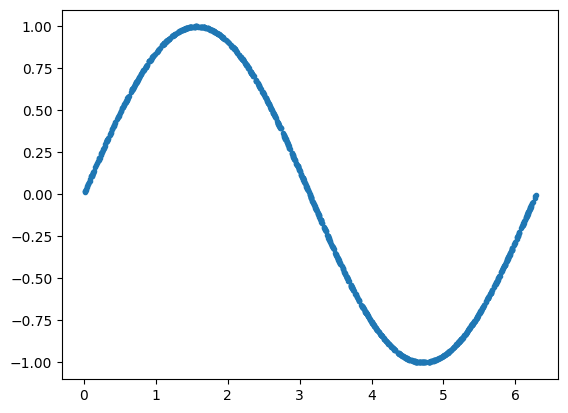

In [ ]:
plt.plot(train_data[:,0],train_data[:,1],".")

In [ ]:
#creating data loader for batch_wise training

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size)
train_loader

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(2,256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64,1),
        nn.Sigmoid(),)#sequential

  def forward(self,x):
    output=self.model(x)
    return output

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2)
    )
  def forward(self,x):
    output=self.model(x)
    return output


In [ ]:
#creating objects for both classes

discriminator = Discriminator()
generator = Generator()

In [ ]:
#setting parameters
#for training

lr = 0.001
num_epochs=300
loss_function=nn.BCELoss()


In [ ]:
#setting optimizers

optimizer_d=torch.optim.Adam(discriminator.parameters(),lr=lr)
optimizer_g=torch.optim.Adam(generator.parameters(),lr=lr)

In [ ]:

#training GAN
for epoch in range(num_epochs):
  for n,(real_samples,_) in enumerate(train_loader):
    real_samples_labels=torch.ones((batch_size,1))
    latent_space_samples=torch.randn((batch_size,2))
    generated_samples=generator(latent_space_samples)
    generated_samples_labels=torch.zeros((batch_size,1))
    all_samples=torch.cat((real_samples,generated_samples))
    all_samples_labels=torch.cat((real_samples_labels,generated_samples_labels))

    #training discriminator
    discriminator.zero_grad()
    output_discriminator=discriminator(all_samples)
    loss_discriminator=loss_function(output_discriminator,all_samples_labels)
    loss_discriminator.backward()
    optimizer_d.step()

    #generate random noise for training generator
    latent_space_samples=torch.randn((batch_size,2))

    #training generator
    generator.zero_grad()
    generated_samples=generator(latent_space_samples)
    output_discriminator_generated=discriminator(generated_samples)
    loss_generator=loss_function(output_discriminator_generated,real_samples_labels)
    loss_generator.backward()
    optimizer_g.step()

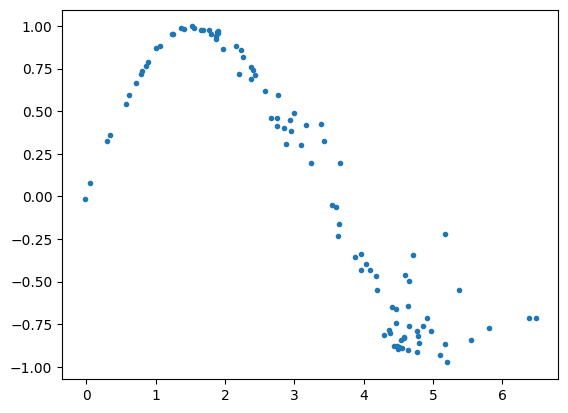

In [ ]:
#generating fake data  and visualising

latent_space_samples = torch.randn(100,2)
generated_samples=generator(latent_space_samples)
generated_samples=generated_samples.detach()
plt.plot(generated_samples[:,0],generated_samples[:,1], ".")